# Data Collection and Cleaning

## Step 1: Import Library and Dataset

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("transaction.csv")

## Step 2: List all column names, data types and check if there is any null values

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641914 entries, 0 to 641913
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   accountNumber             641914 non-null  int64  
 1   customerId                641914 non-null  int64  
 2   creditLimit               641914 non-null  int64  
 3   availableMoney            641914 non-null  float64
 4   transactionDateTime       641914 non-null  object 
 5   transactionAmount         641914 non-null  float64
 6   merchantName              641914 non-null  object 
 7   acqCountry                638001 non-null  object 
 8   merchantCountryCode       641290 non-null  object 
 9   posEntryMode              638569 non-null  float64
 10  posConditionCode          641627 non-null  float64
 11  merchantCategoryCode      641914 non-null  object 
 12  currentExpDate            641914 non-null  object 
 13  accountOpenDate           641914 non-null  o

## Step 3: Check content of the top 10 rows in the datasets

In [3]:
# melihat cuplikan data
df.head(10)

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,isFraud,currentBalance,cardPresent,expirationDateKeyInMatch
0,733493772,733493772,5000,5000.00,2016-01-08T19:04:50,111.33,Lyft,US,US,5.0,...,3/8/2014,3/8/2014,492,492,9184,PURCHASE,True,0.00,False,False
1,733493772,733493772,5000,4888.67,2016-01-09T22:32:39,24.75,Uber,US,US,9.0,...,3/8/2014,3/8/2014,492,492,9184,PURCHASE,False,111.33,False,False
2,733493772,733493772,5000,4863.92,2016-01-11T13:36:55,187.40,Lyft,US,US,5.0,...,3/8/2014,3/8/2014,492,492,9184,PURCHASE,False,136.08,False,False
3,733493772,733493772,5000,4676.52,2016-01-11T22:47:46,227.34,Lyft,US,US,2.0,...,3/8/2014,3/8/2014,492,492,9184,PURCHASE,True,323.48,False,False
4,733493772,733493772,5000,4449.18,2016-01-16T01:41:11,0.00,Lyft,US,US,2.0,...,3/8/2014,3/8/2014,492,492,9184,ADDRESS_VERIFICATION,False,550.82,False,False
5,733493772,733493772,5000,4449.18,2016-01-16T21:35:27,9.80,Fresh eCards,US,US,5.0,...,3/8/2014,3/8/2014,492,492,9184,PURCHASE,False,550.82,False,False
6,733493772,733493772,5000,4439.38,2016-01-24T07:54:01,247.99,Uber,NaN,US,5.0,...,3/8/2014,3/8/2014,492,492,9184,PURCHASE,False,560.62,False,False
7,733493772,733493772,5000,4191.39,2016-01-26T05:28:24,0.00,Universe Massage #95463,US,US,5.0,...,3/8/2014,3/8/2014,492,492,9184,ADDRESS_VERIFICATION,False,808.61,False,False
8,733493772,733493772,5000,4191.39,2016-01-26T12:18:14,11.54,Universe Massage #70014,US,US,5.0,...,3/8/2014,3/8/2014,492,492,9184,PURCHASE,False,808.61,True,False
9,733493772,733493772,5000,4179.85,2016-01-26T12:19:15,11.54,Universe Massage #70014,US,US,5.0,...,3/8/2014,3/8/2014,492,492,9184,REVERSAL,False,820.15,True,False


## Step 4: Run Descriptive Statistic for each numerical and descriptive data type

In [4]:
# numeric descriptive: Check the mean, std, min, Q1, Q2, Q3, max
df.describe()

,accountNumber,customerId,creditLimit,availableMoney,transactionAmount,posEntryMode,posConditionCode,cardCVV,enteredCVV,cardLast4Digits,currentBalance
count,6.419140e+05,6.419140e+05,641914.000000,641914.000000,641914.000000,638569.000000,641627.000000,641914.000000,641914.000000,641914.000000,641914.000000
mean,5.547701e+08,5.547701e+08,10697.210608,6652.828573,135.162497,9.136460,3.238367,557.199927,556.775160,4886.184043,4044.382035
std,2.546884e+08,2.546884e+08,11460.359133,9227.132275,147.053302,16.961185,9.680862,257.326204,257.402639,2859.053679,5945.510224
min,1.005471e+08,1.005471e+08,250.000000,-1244.930000,0.000000,2.000000,1.000000,100.000000,1.000000,0.000000,0.000000
25%,3.223192e+08,3.223192e+08,5000.000000,1114.970000,32.320000,2.000000,1.000000,334.000000,333.000000,2364.000000,502.442500
50%,5.438879e+08,5.438879e+08,7500.000000,3578.165000,85.800000,5.000000,1.000000,581.000000,580.000000,4873.000000,2151.860000
75%,7.862277e+08,7.862277e+08,15000.000000,8169.185000,189.030000,9.000000,1.000000,762.000000,761.000000,7267.000000,5005.890000
max,9.999853e+08,9.999853e+08,50000.000000,50000.000000,1825.250000,90.000000,99.000000,998.000000,998.000000,9998.000000,47496.500000


In [5]:
# categorical descriptive: Check the categorical data based on total counts, total unique values, most frequent value and its frequency
df.describe(include=object)

,transactionDateTime,merchantName,acqCountry,merchantCountryCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,transactionType
count,641914,641914,638001,641290,641914,641914,641914,641914,641325
unique,635472,2493,4,4,19,165,1826,2186,3
top,2016-01-19T04:26:56,Lyft,US,US,online_retail,1/5/2026,11/12/2015,20/7/2016,PURCHASE
freq,3,25311,632303,635577,161469,4209,10137,3948,608685


## Step 5: Check for Missing Values

In [6]:
# Checking missing values per records
df.isnull()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,isFraud,currentBalance,cardPresent,expirationDateKeyInMatch
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
641909,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
641910,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
641911,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
641912,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:
# Looking at columns that have missing values
df[df.isnull().any(axis = 1)]

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,isFraud,currentBalance,cardPresent,expirationDateKeyInMatch
6,733493772,733493772,5000,4439.38,2016-01-24T07:54:01,247.99,Uber,NaN,US,5.0,...,3/8/2014,3/8/2014,492,492,9184,PURCHASE,False,560.62,False,False
32,733493772,733493772,5000,2457.68,2016-03-26T17:23:05,341.98,Uber,US,US,NaN,...,3/8/2014,3/8/2014,492,492,9184,PURCHASE,False,2542.32,False,False
153,733493772,733493772,5000,559.50,2016-11-17T20:33:50,266.66,Uber,US,US,NaN,...,3/8/2014,26/6/2016,492,492,9184,PURCHASE,False,4440.50,False,False
201,578754168,578754168,5000,4676.42,2016-08-26T13:09:55,93.44,Boston Cafe #592935,NaN,NaN,9.0,...,21/10/2015,21/10/2015,413,413,5279,PURCHASE,False,323.58,True,False
563,223895414,223895414,50000,50000.00,2016-01-03T17:33:49,144.04,Franks Restaurant,NaN,US,9.0,...,31/5/2014,31/5/2014,671,671,2849,PURCHASE,False,0.00,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
641330,298100844,298100844,5000,1665.99,2016-06-13T02:51:23,94.87,Ray's Fries #745083,US,US,NaN,...,30/3/2014,5/1/2016,204,204,6087,PURCHASE,False,3334.01,True,False
641511,298100844,298100844,5000,678.23,2016-10-25T05:30:34,189.98,Downtown Pub,US,US,NaN,...,30/3/2014,5/1/2016,881,881,5160,PURCHASE,False,4321.77,True,False
641626,877651598,877651598,7500,5854.66,2016-11-21T02:19:09,52.51,Lyft,NaN,NaN,5.0,...,7/1/2012,7/1/2012,547,547,3593,PURCHASE,False,1645.34,False,False
641780,455115932,455115932,50000,36162.74,2016-08-20T08:20:20,2.12,Fresh Online Services,US,US,9.0,...,2/2/2011,2/2/2011,148,148,2521,NaN,False,13837.26,False,False


In [8]:
# checking the number of missing data in every column
df.isnull().sum()

,0
accountNumber,0
customerId,0
creditLimit,0
availableMoney,0
transactionDateTime,0
transactionAmount,0
merchantName,0
acqCountry,3913
merchantCountryCode,624
posEntryMode,3345


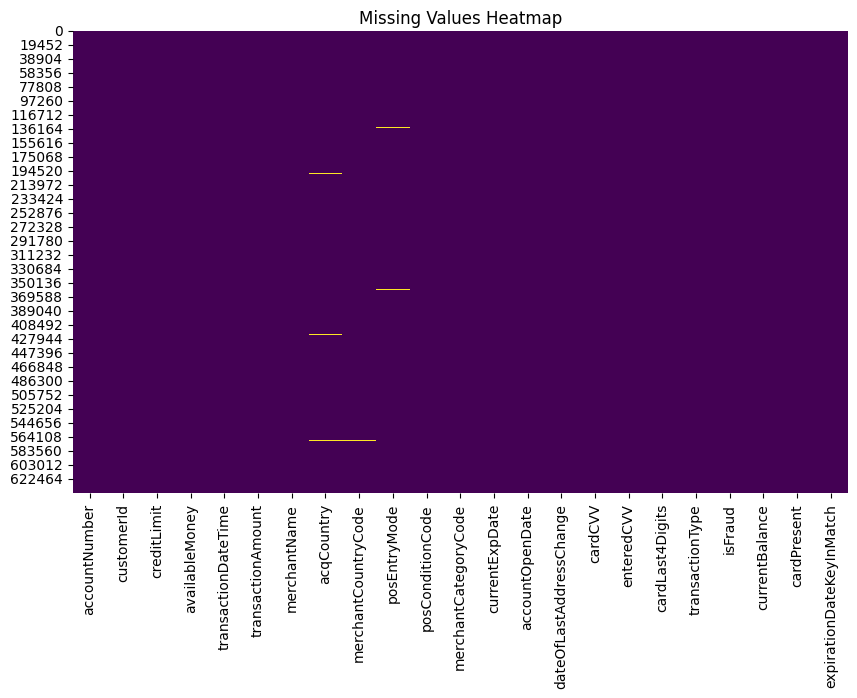

In [9]:
# Use heatmap to visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [10]:
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
accountNumber                  0
customerId                     0
creditLimit                    0
availableMoney                 0
transactionDateTime            0
transactionAmount              0
merchantName                   0
acqCountry                  3913
merchantCountryCode          624
posEntryMode                3345
posConditionCode             287
merchantCategoryCode           0
currentExpDate                 0
accountOpenDate                0
dateOfLastAddressChange        0
cardCVV                        0
enteredCVV                     0
cardLast4Digits                0
transactionType              589
isFraud                        0
currentBalance                 0
cardPresent                    0
expirationDateKeyInMatch       0
dtype: int64


### Handling Missing Values

Based on the analysis of missing values:

1.  **Single Missing Row:** Many columns have exactly one missing value. This suggests a single, incomplete record. We will drop this row to ensure data integrity for critical fields.
2.  **Multiple Missing Values:** For columns like `acqCountry`, `merchantCountryCode`, `posEntryMode`, `posConditionCode`, and `transactionType`, which have a manageable number of missing values, we will impute them with the mode (most frequent value) to preserve as much data as possible.

In [11]:
# Step 1: Drop rows with missing values in 'customerId' (likely the problematic single row)
initial_rows = df.shape[0]
df.dropna(subset=['customerId'], inplace=True)
rows_after_drop = df.shape[0]
print(f"Dropped {initial_rows - rows_after_drop} rows due to missing 'customerId'.")

# Re-check missing values after dropping the row(s)
print("\nMissing values after dropping rows with missing customerId:")
print(df.isnull().sum())

Dropped 0 rows due to missing 'customerId'.

Missing values after dropping rows with missing customerId:
accountNumber                  0
customerId                     0
creditLimit                    0
availableMoney                 0
transactionDateTime            0
transactionAmount              0
merchantName                   0
acqCountry                  3913
merchantCountryCode          624
posEntryMode                3345
posConditionCode             287
merchantCategoryCode           0
currentExpDate                 0
accountOpenDate                0
dateOfLastAddressChange        0
cardCVV                        0
enteredCVV                     0
cardLast4Digits                0
transactionType              589
isFraud                        0
currentBalance                 0
cardPresent                    0
expirationDateKeyInMatch       0
dtype: int64


In [12]:
# Step 2: Impute missing values in specified columns with their mode
columns_to_impute_mode = ['acqCountry', 'merchantCountryCode', 'posEntryMode', 'posConditionCode', 'transactionType']

for col in columns_to_impute_mode:
    if df[col].isnull().sum() > 0:
        mode_value = df[col].mode()[0]
        # Fix: Assign the result of fillna back to the column to avoid FutureWarning
        df[col] = df[col].fillna(mode_value)
        print(f"Imputed missing values in '{col}' with mode: {mode_value}")

# Verify no more missing values in the imputed columns
print("\nMissing values after mode imputation:")
print(df[columns_to_impute_mode].isnull().sum())

Imputed missing values in 'acqCountry' with mode: US
Imputed missing values in 'merchantCountryCode' with mode: US
Imputed missing values in 'posEntryMode' with mode: 5.0
Imputed missing values in 'posConditionCode' with mode: 1.0
Imputed missing values in 'transactionType' with mode: PURCHASE

Missing values after mode imputation:
acqCountry             0
merchantCountryCode    0
posEntryMode           0
posConditionCode       0
transactionType        0
dtype: int64


### Final Check for Missing Values

Let's perform a final check across the entire DataFrame to ensure all targeted missing values have been addressed.

In [13]:
print(df.isnull().sum().sum())

0


## Step 6: Check for Duplicate Rows

In [14]:
print(f"Number of duplicate rows: {df.duplicated().sum()}")

Number of duplicate rows: 0


## Step 7: Handle Outlier

### Normalize Numerical Data


In [17]:
# Columns to be normalized using log1p transformation
columns_to_normalize = ['creditLimit', 'availableMoney', 'transactionAmount', 'currentBalance']

for col in columns_to_normalize:
    new_col_name = f'log_{col}'
    # Handle negative values in 'availableMoney' before log transformation
    if col == 'availableMoney':
        df[new_col_name] = np.log1p(np.maximum(0, df[col]))
    else:
        # Apply log1p transformation and create a new column
        df[new_col_name] = np.log1p(df[col])
    print(f"Created new column '{new_col_name}' with log1p transformation.")

# Display the head of the DataFrame with the new log-transformed columns
print("\nDataFrame head with log-transformed columns:")
display(df[[col for col in columns_to_normalize] + [f'log_{col}' for col in columns_to_normalize]].head())

Created new column 'log_creditLimit' with log1p transformation.
Created new column 'log_availableMoney' with log1p transformation.
Created new column 'log_transactionAmount' with log1p transformation.
Created new column 'log_currentBalance' with log1p transformation.

DataFrame head with log-transformed columns:


,creditLimit,availableMoney,transactionAmount,currentBalance,log_creditLimit,log_availableMoney,log_transactionAmount,log_currentBalance
0,5000,5000.00,111.33,0.00,8.517393,8.517393,4.721441,0.000000
1,5000,4888.67,24.75,111.33,8.517393,8.494880,3.248435,4.721441
2,5000,4863.92,187.40,136.08,8.517393,8.489806,5.238567,4.920565
3,5000,4676.52,227.34,323.48,8.517393,8.450523,5.430836,5.782224
4,5000,4449.18,0.00,550.82,8.517393,8.400700,0.000000,6.313222


### Check Skewness of Normalized Columns

Let's re-check the skewness of these new log-transformed columns to see the effect of the normalization.

In [18]:
print("Skewness for log-transformed numerical columns:")
for col in columns_to_normalize:
    log_col_name = f'log_{col}'
    skewness_value = df[log_col_name].skew()
    print(f"  {log_col_name}: {skewness_value:.4f}")

Skewness for log-transformed numerical columns:
  log_creditLimit: -0.8696
  log_availableMoney: -0.9475
  log_transactionAmount: -0.9690
  log_currentBalance: -1.6175


### Visualize Outliers in Log-Transformed Data

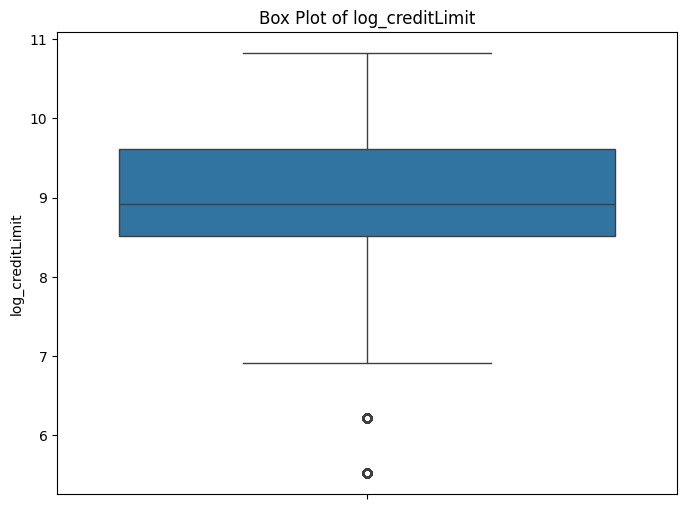

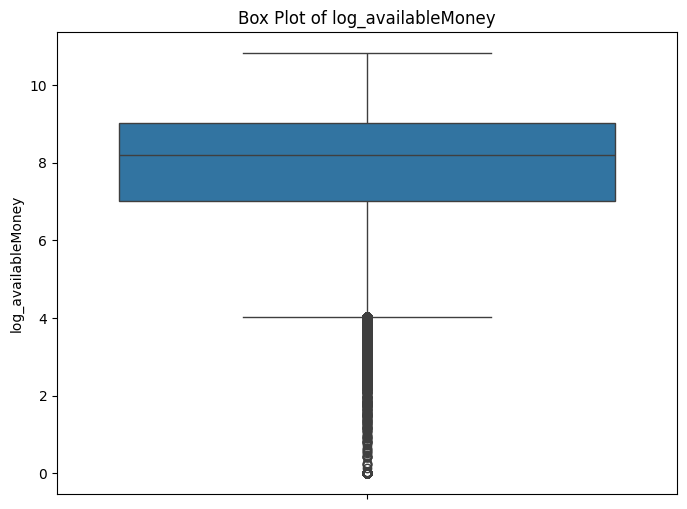

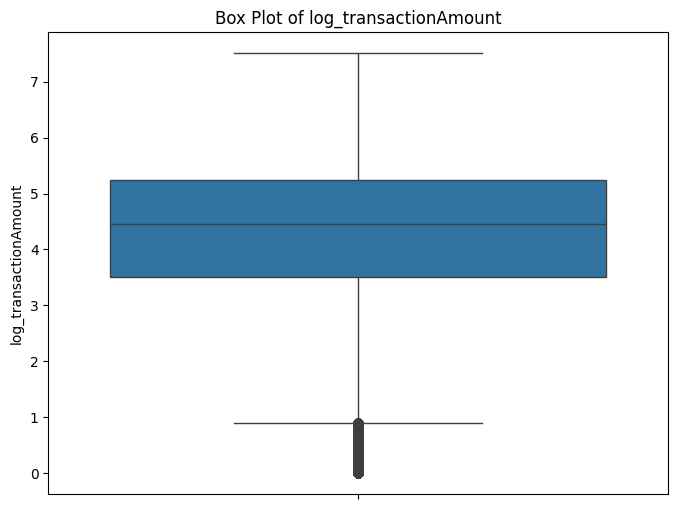

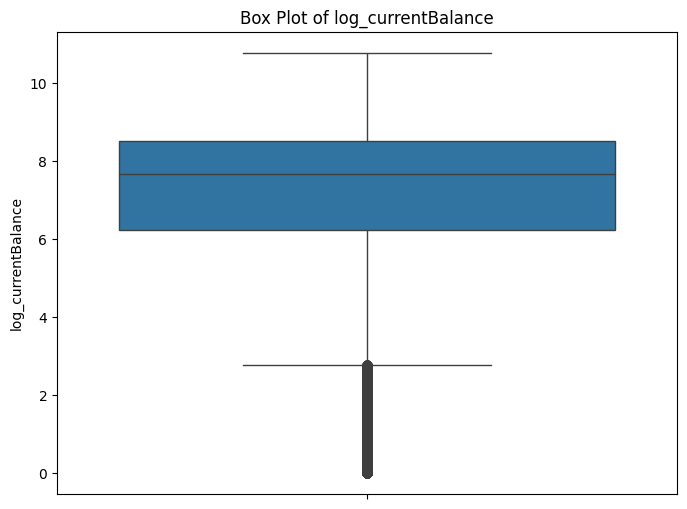

In [20]:
columns_to_visualize = ['log_creditLimit', 'log_availableMoney', 'log_transactionAmount', 'log_currentBalance']

for col in columns_to_visualize:
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
    plt.show()

### Handle Outliers

In [21]:
columns_to_handle_outliers = ['log_creditLimit', 'log_availableMoney', 'log_transactionAmount', 'log_currentBalance']

for col in columns_to_handle_outliers:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap outliers
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
    print(f"Outliers in '{col}' capped using IQR method. Lower bound: {lower_bound:.4f}, Upper bound: {upper_bound:.4f}")

print("\nOutlier handling complete for specified log-transformed columns.")

Outliers in 'log_creditLimit' capped using IQR method. Lower bound: 6.8697, Upper bound: 11.2636
Outliers in 'log_availableMoney' capped using IQR method. Lower bound: 4.0313, Upper bound: 11.9944
Outliers in 'log_transactionAmount' capped using IQR method. Lower bound: 0.8946, Upper bound: 7.8587
Outliers in 'log_currentBalance' capped using IQR method. Lower bound: 2.7758, Upper bound: 11.9642

Outlier handling complete for specified log-transformed columns.


### Visualize after Outliers being handled

Box Plots of Log-Transformed Columns After Outlier Capping:


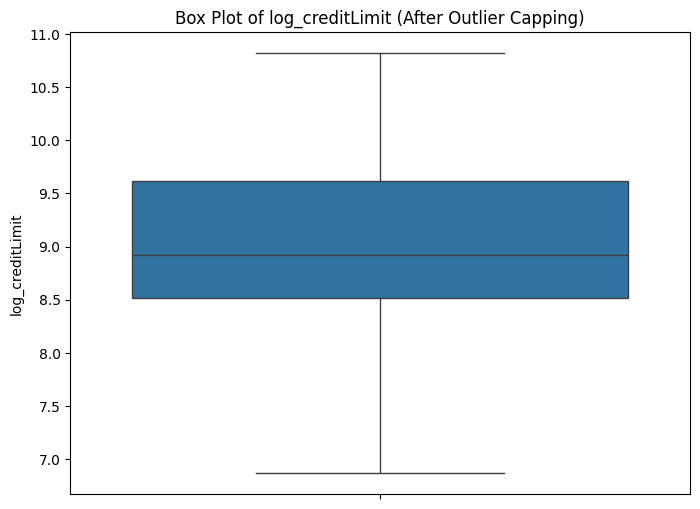

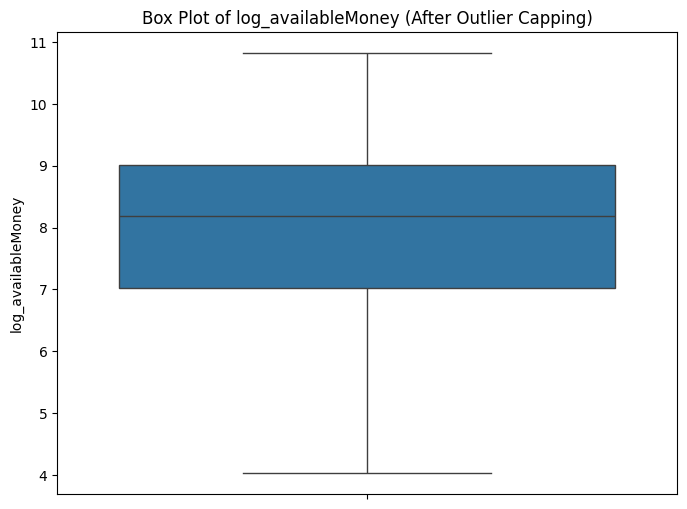

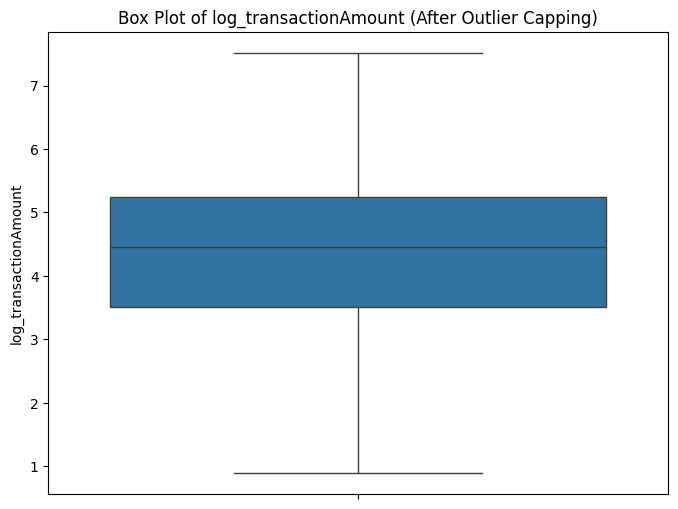

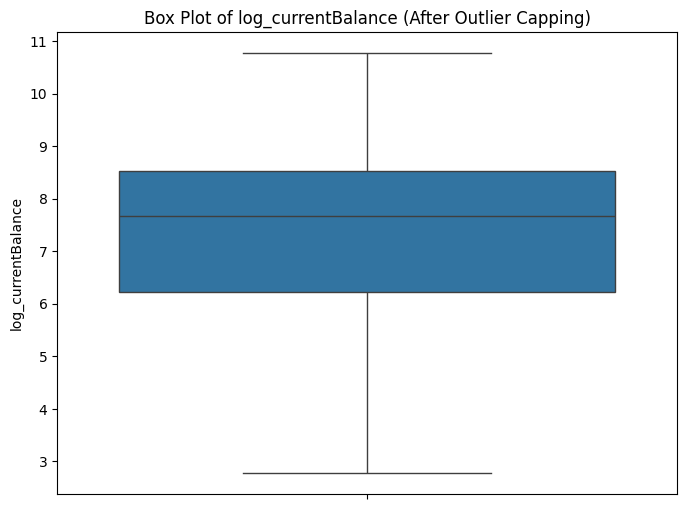

In [22]:
columns_to_visualize = ['log_creditLimit', 'log_availableMoney', 'log_transactionAmount', 'log_currentBalance']

print("Box Plots of Log-Transformed Columns After Outlier Capping:")
for col in columns_to_visualize:
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col} (After Outlier Capping)')
    plt.ylabel(col)
    plt.show()

## Step 8: Convert 'posEntryMode' and 'posConditionCode' to Categorical Types

Given their high skewness and the interpretation that they represent codes rather than continuous numerical values, converting `posEntryMode` and `posConditionCode` to categorical types will improve their handling in further analysis and modeling.

### Value Counts for 'posEntryMode'

In [26]:
print(df['posEntryMode'].value_counts())

posEntryMode
5.0     255615
9.0     193193
2.0     160589
90.0     16251
80.0     12921
Name: count, dtype: int64


### Value Counts for 'posConditionCode'

In [27]:
print(df['posConditionCode'].value_counts())

posConditionCode
1.0     514144
8.0     121507
99.0      5976
Name: count, dtype: int64


### Verify the data types before conversion

In [28]:
df[['posEntryMode', 'posConditionCode']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641914 entries, 0 to 641913
Data columns (total 2 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   posEntryMode      638569 non-null  float64
 1   posConditionCode  641627 non-null  float64
dtypes: float64(2)
memory usage: 9.8 MB


### Convert data type from numerical to categorical

In [29]:
df['posEntryMode'] = df['posEntryMode'].astype('category')
df['posConditionCode'] = df['posConditionCode'].astype('category')

print("Converted 'posEntryMode' and 'posConditionCode' to categorical types.")

Converted 'posEntryMode' and 'posConditionCode' to categorical types.


### Verify the data types after conversion

In [30]:
df[['posEntryMode', 'posConditionCode']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641914 entries, 0 to 641913
Data columns (total 2 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   posEntryMode      638569 non-null  category
 1   posConditionCode  641627 non-null  category
dtypes: category(2)
memory usage: 1.2 MB


## Step 9: Convert Date Columns to Datetime Objects

The columns `transactionDateTime`, `currentExpDate`, `accountOpenDate`, and `dateOfLastAddressChange` are currently of `object` (string) type. Converting them to datetime objects is crucial for any time-based analysis or feature engineering.

In [31]:
date_columns = ['transactionDateTime', 'currentExpDate', 'accountOpenDate', 'dateOfLastAddressChange']

for col in date_columns:
    # Using errors='coerce' to turn unparseable dates into NaT (Not a Time)
    df[col] = pd.to_datetime(df[col], errors='coerce')
    print(f"Column '{col}' converted to datetime.")

print("\nVerifying data types after conversion:")
display(df[date_columns].info())

Column 'transactionDateTime' converted to datetime.
Column 'currentExpDate' converted to datetime.
Column 'accountOpenDate' converted to datetime.
Column 'dateOfLastAddressChange' converted to datetime.

Verifying data types after conversion:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641914 entries, 0 to 641913
Data columns (total 4 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   transactionDateTime      641914 non-null  datetime64[ns]
 1   currentExpDate           641914 non-null  datetime64[ns]
 2   accountOpenDate          255313 non-null  datetime64[ns]
 3   dateOfLastAddressChange  247869 non-null  datetime64[ns]
dtypes: datetime64[ns](4)
memory usage: 19.6 MB


None

## Last Step: Check all data type after fixing

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641914 entries, 0 to 641913
Data columns (total 27 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   accountNumber             641914 non-null  int64         
 1   customerId                641914 non-null  int64         
 2   creditLimit               641914 non-null  int64         
 3   availableMoney            641914 non-null  float64       
 4   transactionDateTime       641914 non-null  datetime64[ns]
 5   transactionAmount         641914 non-null  float64       
 6   merchantName              641914 non-null  object        
 7   acqCountry                638001 non-null  object        
 8   merchantCountryCode       641290 non-null  object        
 9   posEntryMode              638569 non-null  category      
 10  posConditionCode          641627 non-null  category      
 11  merchantCategoryCode      641914 non-null  object        
 12  cu